## Bem vindo ao nosso algoritmo básico de classificação de imagens usando regressão logistica  
Aqui você pode treinar um modelo simples para classificar fotos manuscritas
Resumindo: O algoritmo preverá qual número é escrito na imagem







In [7]:
#Importando as bibliotecas que usaremos
import tensorflow as tf      #machine learning
import matplotlib.pyplot as plt    #plotting/loading images
import numpy as np  #linear algebra

###↪ **Abaixo, inicializamos o carregamento do conjunto de dados MNIST**

In [8]:
mnista = tf.keras.datasets.mnist
(X_test, Y_test), (x_cv, y_cv)=mnista.load_data()

In [120]:
X_test.shape

(60000, 28, 28)

↪   Você deve obter este resultado:

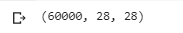


↪   **Isso significa que você tem 60.000 fotos que têm 28x28 pixels cada**

###↪Dividindo por 255
As imagens geralmente recebem números de 0 para 255. O **primeiro** significa VERMELHO, o **segundo** significa VERDE e o **terceiro** significa AZUL.





In [9]:

X_test= X_test /255.0
x_cv= x_cv / 255.0
labels=['0', '1', '3', '4', '5', '6', '7', '8', '9']

#↪ Aqui nós chamamos e importamos as classes para treinar nosso modelo
Aqui está a nossa rede neural, com 3 camadas.
ps: A camada **Flatten** é para converter a matriz 2D em matriz 1D. É como se você estivesse fazendo um **np.reshape()**

In [10]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import Sequential
model= Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation= 'relu'),
    Dense(10, activation='softmax')
])

####  ↪  Treinando nosso modelo
Aqui nos vamos compilar nosso modelo usando o **[Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)**, [sparse categorical cross entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) e a métrica **Accuracy**


In [32]:
class LossHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])






loss_history = LossHistory()
model.fit(X_test, Y_test, epochs=5, callbacks=loss_history)
loss_values = loss_history.losses




Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0391 - accuracy: 0.9876
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0299 - accuracy: 0.9908
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0196 - accuracy: 0.9941
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0164 - accuracy: 0.9953


 ↪.fit Aqui está o seu código final para finalmente treinar o modelo, para que você possa colocar, como parâmetros, o seu conjunto de treino X_test, Y_test

## ↪After completed, we can **evaluate our model** a very important step that show us how well our model is going
That happens putting our "second" dataset to train (x_cv, y_xv)
if the accuracy is less than the acctual accuracy (from X_test) then we are having an **Overfitting** problem
if we have a very low accuracy, we are having an **underfitting**.

In [12]:
loss, acc = model.evaluate(x_cv, y_cv, verbose=2)
acc= acc * 100
acc= str(acc)

prediction= model.predict(x_cv)
print(f'A acurácia deste modelo é de {acc[:4]}%')
filters= model.get_weights()[0].shape


313/313 - 1s - loss: 0.0809 - accuracy: 0.9756 - 1s/epoch - 4ms/step
313/313 [==============================] - 2s 5ms/step
A acurácia deste modelo é de 97.5%


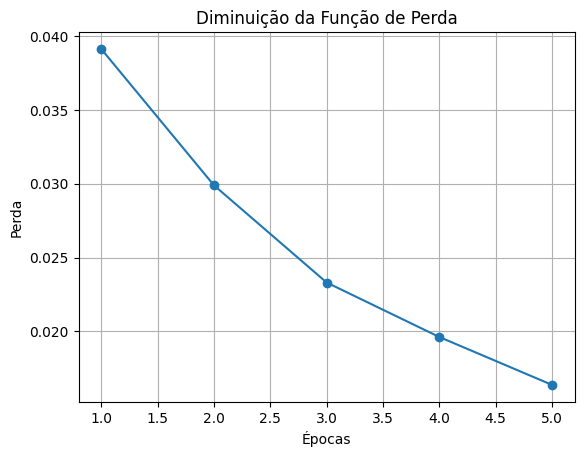

In [33]:
# plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o')
# plt.xlabel('Épocas')
# plt.ylabel('Perda')
# plt.title('Diminuição da Função de Perda')
# plt.grid(True)
# plt.show()

↪ The code above show us the shape at prediction.
After executed, the code **.prediction** generates us an array with 10 numbers that have a **probability** of each of our number.

↪Example: propability of being 0 [2.034] **This have a low probability**
probabilit of being 6 [9.341]. **This have a high probability, so, this number should be 6**

## ↪Here you can edit to verify if the model is going well

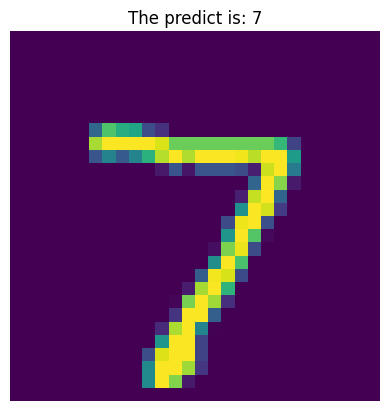

In [125]:
number_of_data= 0            #here you can set a number from 0 to 10.000 (range of images)
pos= np.argmax(prediction[number_of_data])   #Here we get the high probability of the array

plt.axis('off')
plt.title(f'The predict is: {pos}')
plt.imshow(x_cv[number_of_data])

1366x768


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


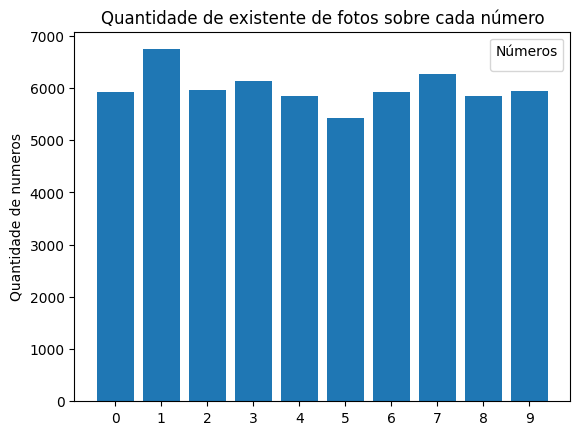

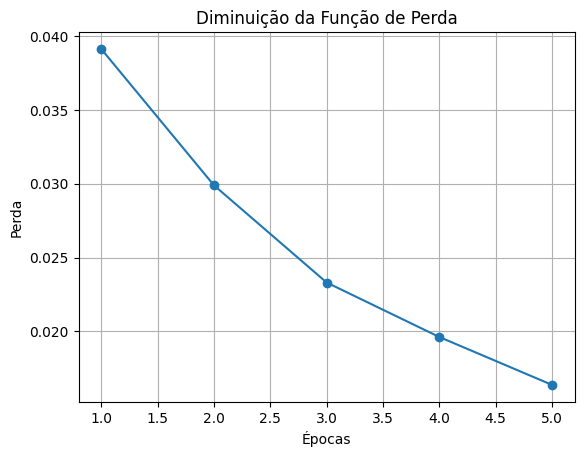

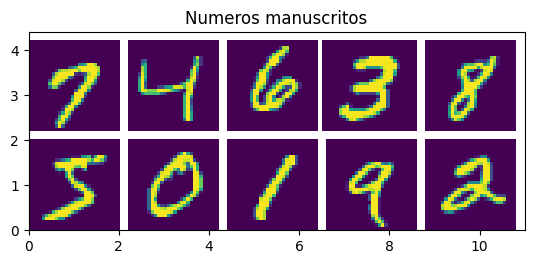

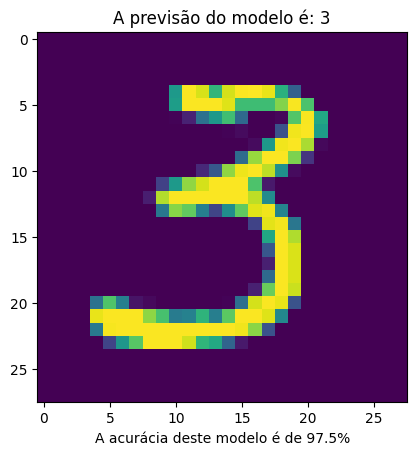

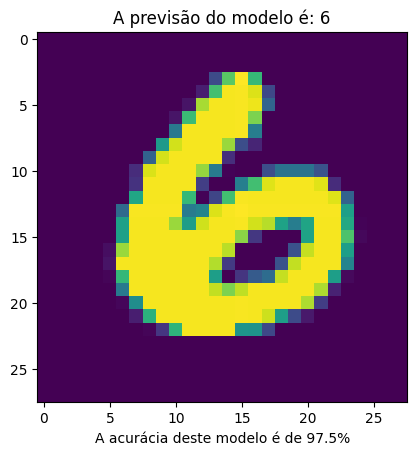

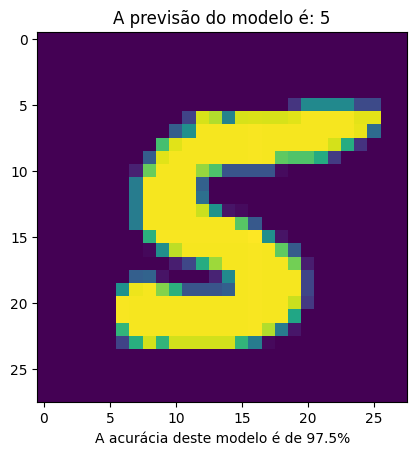

In [36]:
import tkinter as tk
import matplotlib.image as mpimg
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from PIL import Image, ImageTk
from tkinter import ttk
from tkinter import messagebox
from time import sleep
main= tk.Tk()
main.title('Classificador de imagens')
largura = main.winfo_screenwidth()
altura = main.winfo_screenheight()
main.geometry(f'{largura}x{altura}')
main.config(background='white')
label_1=tk.Label(bg='#6a7a79', width=35, height=100)
label_1.place(relx=0, rely=0 )
###############################
bt1=tk.Label(text="Ver exemplos", fg="white", cursor="hand2", bg='#6a7a79', font=('Helvetica', '14'))
bt1.place(relx=0.01, rely=0.36)




def acao_com_texto():
    global x_cv
    global number_of_data
    global acc
    global prediction
    data= tk.Toplevel()
    number_of_data= np.random.randint(0, 10000)
    figg, axx= plt.subplots()
    pos= np.argmax(prediction[number_of_data])  
    axx.set_title(f'A previsão do modelo é: {pos}')
    axx.set_xlabel(f'A acurácia deste modelo é de {acc[:4]}%')
    axx.imshow(x_cv[number_of_data])
    canvas = FigureCanvasTkAgg(figg, master=data)
    canvas.get_tk_widget().pack(fill='both')

    # texto_digitado = entrada.get()
    # resultado.config(text=f"Texto Digitado: {texto_digitado}")
def clicavel():
    nj_graf= tk.Toplevel()
    

    fig, ax = plt.subplots()
    imagem1 = X_test[0]
    imagem2 = X_test[1]
    im3=X_test[2]
    im4=X_test[3]
    im5=X_test[4]
    im6=X_test[5]
    im7=X_test[7]

    im8=X_test[13]
    im9=X_test[15]
    im10=X_test[17]
    # Insira a primeira imagem nas coordenadas (x1, y1)
    ax.imshow(imagem1, extent=[0, 2, 0, 2])

    # Insira a segunda imagem nas coordenadas (x2, y2)
    ax.imshow(imagem2, extent=[2.2, 4.2, 0, 2])

    ax.imshow(im3, extent=[2.2, 4.2, 2.2, 4.2])
    ax.imshow(im4, extent=[4.4, 6.4, 0, 2])
    ax.imshow(im5, extent=[6.6, 8.6, 0, 2])
    ax.imshow(im6, extent=[8.8, 10.8, 0, 2])
    ax.imshow(im7, extent=[6.5, 8.6, 2.2, 4.2])
    ax.imshow(im8, extent=[4.4, 6.4, 2.2, 4.2])
    ax.imshow(im9, extent=[0, 2, 2.2, 4.2])
    ax.imshow(im10, extent=[8.8, 10.8, 2.2, 4.2])

    ax.set_xlim(0, 11)
    ax.set_ylim(0, 4.4)
    # plt.axis('off')
    plt.title("Numeros manuscritos")
    canvas = FigureCanvasTkAgg(fig, master=nj_graf)
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
def testar():
    nj= tk.Toplevel()
    nj.geometry('550x300')
    global f4
    

    f4.place(width=1000, height=1000, relx=0.3, rely=0.2)
    e1= tk.Label(nj, text='Aperte o botão para fazer a estimativa', font=('Verdana', '20'))
    e1.place(relx=0.02, rely=0.1)
    botao = tk.Button(nj, text="Ação", command=lambda: acao_com_texto(), bd=0.8 , width=20)
    botao.place(relx=0.34, rely=0.57)
    



bt1.bind("<Button-1>", lambda event: clicavel())
fr1= tk.Frame(bg='black')
fr1.place(relx=0.3, rely=0)

f4= tk.Frame(bg='white')
#f4.place(width=1000, height=1000, relx=0.3, rely=0.2)

fr2=tk.Frame(bg='black')
fr2.place(relx=0.3, rely=0)
print(f'{largura}x{altura}')
bt2=tk.Label(text="Testar", fg="white", cursor="hand2", bg='#6a7a79', font=('Helvetica', '14'))
bt2.place(relx=0.01, rely=0.26)
bt2.bind('<Button-1>', lambda event: testar())
###################################################

imagem = Image.open("robot.png")

# Crie um objeto ImageTk a partir da imagem carregada
imagem_tk = ImageTk.PhotoImage(imagem)
lbl_img= tk.Label(image=imagem_tk, bg='#6a7a79')
lbl_img.place(relx=0.01, rely=0.1)


bt3=tk.Label(text="Classificador", fg="white", bg='#6a7a79', font=('Verdana', '19'))
bt4=tk.Label(text="de imagens", fg="white", bg='#6a7a79', font=('Verdana', '19'))
bt4.place(relx=0.06, rely=0.130)


bt3.place(relx=0.06, rely=0.09)
bt5=tk.Label(text="Grafico", fg="white", cursor="hand2", bg='#6a7a79', font=('Helvetica', '14'))
bt5.place(relx=0.01, rely=0.45)
bt5.bind('<Button-1>', lambda event: graf())
def graf():
    global all
    new_graf= tk.Toplevel()
    feg, ag= plt.subplots()
    # ag.set_xlim(0, 10)
    # ag.set_ylim(0,20)
    num= list(range(10))
    bar_colors = ['red', 'blue', 'gray', 'orange', 'black','yellow', 'purple', 'green', 'brown', 'pink' ]
    label= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ag.bar(num, all)
    plt.xticks(range(10))
    plt.title('Quantidade de existente de fotos sobre cada número')
    ag.set_ylabel('Quantidade de numeros')
    ag.legend(title="Números")

    
    canva = FigureCanvasTkAgg(feg, master=new_graf)
    canva.get_tk_widget().pack(fill='both', side='right')

    fig, ax= plt.subplots()
    ax.plot(range(1, len(loss_values) + 1), loss_values, marker='o')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Diminuição da Função de Perda')
    plt.grid(True)
    plt.show()
    canv = FigureCanvasTkAgg(fig, master=new_graf)
    canv.get_tk_widget().pack(fill='both', side='left')



imgun= Image.open('unama.png')
una= ImageTk.PhotoImage(imgun)
unama= tk.Label(image=una, width=240, height=150)
unama.place(relx=0.5, rely=0.06)

txt_main=tk.Label(text="Simples uso de redes neurais para classificação de imagens usando o dataset MNIST ", fg="black", bg='white', font=('Verdana', '19'))
txt_main.place(relx=0.2, rely=0.4)
# # # # # # # # # # # # # # # # # # # # # # # # # 
a0= X_test[Y_test==0]
a1= X_test[Y_test==1]
a2= X_test[Y_test==2]
a3= X_test[Y_test==3]
a4= X_test[Y_test==4]
a5= X_test[Y_test==5]
a6= X_test[Y_test==6]
a7= X_test[Y_test==7]
a8= X_test[Y_test==8]
a9= X_test[Y_test==9]

all= [a0.shape[0], a1.shape[0], a2.shape[0], a3.shape[0], a4.shape[0], a5.shape[0], a6.shape[0], a7.shape[0],a8.shape[0],a9.shape[0]]

# # # # # # # # # # # # # # # # # # # # # # # # # 







tk.mainloop()

### Thank for being here with me!
By: Ector Magalhães


**[Linkedin](https://www.linkedin.com/in/ectormgl/)**

**[Github](https://github.com/Ector-Mgl)**